<a href="https://colab.research.google.com/github/Vasyl808/deepfake_video_detection/blob/main/fakeavceleb(train_test_split)_balanced_ready.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install facenet_pytorch --no-deps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.3 MB/s eta 0:00:00


In [3]:
!gdown --fuzzy https://drive.google.com/file/d/1abOH_th3RXci7yUrN4TWCKWTjVUTVMKv/view?usp=sharing -O FakeAVCeleb.zip

Downloading...
From (original): https://drive.google.com/uc?id=1abOH_th3RXci7yUrN4TWCKWTjVUTVMKv
From (redirected): https://drive.google.com/uc?id=1abOH_th3RXci7yUrN4TWCKWTjVUTVMKv&confirm=t&uuid=1046aaf1-6bf6-4d79-9a81-adf0f9b798a8
To: /content/FakeAVCeleb.zip
100% 6.40G/6.40G [01:21<00:00, 78.7MB/s]


In [4]:
!unzip /content/FakeAVCeleb.zip

Показано результат, скорочений до останніх рядків (5000).
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id01075_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id01216_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id01231_XXpYdOHUF-g.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id01238_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id02466_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id03556_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id03605_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id03707_pwNcRPQ5qdo.mp4  
  inflating: FakeAVCeleb

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Завантажуємо та обробляємо дані
df = pd.read_csv('/content/FakeAVCeleb/meta_data.csv')

# Вибираємо лише категорії A та C
df_filtered = df[df['category'].isin(['A', 'C'])]

# Фільтруємо до 500 унікальних джерел у категорії "C"
df_category_c = df_filtered[df_filtered['category'] == 'C']
df_category_c_unique = df_category_c.drop_duplicates(subset=['source']).head(500)

# Переконуємось, що в категорії "C" дійсно 500 унікальних джерел
if df_category_c_unique['source'].nunique() < 500:
    raise ValueError("Недостатньо унікальних джерел у категорії 'C'.")

# Фільтруємо до 500 записів у категорії "A"
df_category_a = df_filtered[df_filtered['category'] == 'A'].head(500)

# Об’єднуємо обидві вибірки
df_sampled = pd.concat([df_category_a, df_category_c_unique])

# Застосовуємо групування та вибираємо до 50 унікальних значень у кожній комбінації
df_unique = df_sampled.groupby(['category', 'race', 'gender']).apply(lambda x: x.drop_duplicates(subset=['source', 'path']).head(50))
df_unique = df_unique.reset_index(drop=True)

# Створюємо стовпець для стратефікації
df_unique['stratify_col'] = df_unique['category'].astype(str) + '_' + df_unique['race'] + '_' + df_unique['gender']

# Розділяємо на тренувальний і тестовий набори, використовуючи стратефікацію
train_df, test_df = train_test_split(
    df_unique,
    test_size=0.2,
    random_state=42,
    stratify=df_unique['stratify_col']
)

# Видаляємо допоміжний стовпець для стратефікації
train_df = train_df.drop(columns=['stratify_col'])
test_df = test_df.drop(columns=['stratify_col'])

# Зберігаємо результати у файли CSV
train_df.to_csv("train_dataset.csv", index=False)
test_df.to_csv("test_dataset.csv", index=False)


<ipython-input-5-fd89063fc581>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_unique = df_sampled.groupby(['category', 'race', 'gender']).apply(lambda x: x.drop_duplicates(subset=['source', 'path']).head(50))


In [6]:
train_df

,source,target1,target2,method,category,type,race,gender,path,Unnamed: 9
733,id07058,id03344,-,faceswap,C,FakeVideo-RealAudio,Asian (South),men,00010_id03344_vyNnOo6lU0o_faceswap.mp4,FakeAVCeleb/FakeVideo-RealAudio/Asian (South)/...
296,id07236,-,-,real,A,RealVideo-RealAudio,Asian (South),women,00143.mp4,FakeAVCeleb/RealVideo-RealAudio/Asian (South)/...
642,id08299,0.mp4,-,faceswap,C,FakeVideo-RealAudio,Asian (East),men,00110_0.mp4,FakeAVCeleb/FakeVideo-RealAudio/Asian (East)/m...
522,id01392,1.mp4,-,faceswap,C,FakeVideo-RealAudio,African,men,00167_1.mp4,FakeAVCeleb/FakeVideo-RealAudio/African/men/id...
984,id00823,id00395,-,faceswap,C,FakeVideo-RealAudio,Caucasian (European),women,00125_id00395_wM5kGJfTtEM_faceswap.mp4,FakeAVCeleb/FakeVideo-RealAudio/Caucasian (Eur...
...,...,...,...,...,...,...,...,...,...,...
399,id03781,-,-,real,A,RealVideo-RealAudio,Caucasian (American),women,00113.mp4,FakeAVCeleb/RealVideo-RealAudio/Caucasian (Ame...
847,id04216,0.mp4,-,faceswap,C,FakeVideo-RealAudio,Caucasian (American),men,00470_0.mp4,FakeAVCeleb/FakeVideo-RealAudio/Caucasian (Ame...
115,id02561,-,-,real,A,RealVideo-RealAudio,Asian (East),men,02561.mp4,FakeAVCeleb/RealVideo-RealAudio/Asian (East)/m...
13,id00944,-,-,real,A,RealVideo-RealAudio,African,men,00135.mp4,FakeAVCeleb/RealVideo-RealAudio/African/men/id...


In [7]:
print("\nРозподіл за race та gender для кожного класу:")
for category in test_df['category'].unique():
    print(f"\nCategory {category}:")
    print(test_df[test_df['category'] == category][['race', 'gender']].value_counts())



Розподіл за race та gender для кожного класу:

Category C:
race                  gender
African               men       10
                      women     10
Asian (East)          men       10
                      women     10
Asian (South)         men       10
                      women     10
Caucasian (American)  men       10
                      women     10
Caucasian (European)  men       10
                      women     10
Name: count, dtype: int64

Category A:
race                  gender
African               men       10
                      women     10
Asian (East)          men       10
                      women     10
Asian (South)         men       10
                      women     10
Caucasian (American)  men       10
                      women     10
Caucasian (European)  men       10
                      women     10
Name: count, dtype: int64


In [8]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('train_dataset.csv')


result = {}
for _, row in df.iterrows():
    # Формування ключа з шляху
    s = '/'
    file_path = '/content/' + str(row['Unnamed: 9']) + s + row['path']

    label = row['category']


    result[file_path] = {
        'label': label
    }


with open('output_balenced_train.json', 'w') as json_file:
    json.dump(result, json_file)

In [9]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('test_dataset.csv')


result = {}
for _, row in df.iterrows():
    # Формування ключа з шляху
    s = '/'
    file_path = '/content/' + str(row['Unnamed: 9']) + s + row['path']

    label = row['category']


    result[file_path] = {
        'label': label
    }


with open('output_balenced_test.json', 'w') as json_file:
    json.dump(result, json_file)

In [10]:
import json
from collections import Counter

# Зчитування JSON файлу
with open('output_balenced_train.json', 'r') as json_file:
    data = json.load(json_file)

# Ініціалізація лічильника для підрахунку лейблів
label_counts = Counter()

# Підрахунок кожного лейбла
for item in data.values():
    label_counts[item['label']] += 1

# Вивід розподілу лейблів
for label, count in label_counts.items():
    print(f"Label: {label}, Count: {count}")


Label: C, Count: 400
Label: A, Count: 400


In [11]:
import cv2
import itertools
import json
import numpy as np
import pandas as pd
import random
from torch.nn import functional as F
import os.path
import time
import torch
from torch import nn
from torch.nn import functional
import glob
import datetime
import subprocess
from facenet_pytorch import MTCNN
import shutil
import matplotlib.pyplot as plt
from pathlib import Path


class FaceDeepfakeDataset(torch.utils.data.Dataset):
    def __init__(self, folders, n_frames=None, n_audio_reads=50027, train=True, device=None, cache_folder='/content/face_encode_cache'):
        self.n_frames = n_frames
        self.videos = []
        self.train = train
        self.device = device if device is not None else torch.device("cpu")
        self.cache_folder = cache_folder
        self.detector = MTCNN(device=device, post_process=False)

        # Load video paths
        for i in range(len(folders)):
            if train:
                with open('/content/output_balenced_train.json') as f:
                    videos = json.load(f)
                    videos = [(video, metadata) for (video, metadata) in videos.items()]
                    self.videos += videos
            else:
                self.videos += glob.glob(folders[i] + "/*.mp4")

        if self.cache_folder:
            os.makedirs(self.cache_folder, exist_ok=True)

    def __process_frame(self, frame, prev_frame):
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        boxes, _ = self.detector.detect(frame, landmarks=False)  # Отримуємо координати обличчя

        if boxes is None:
            face = prev_frame
            face = cv2.resize(face, (224, 224))
            face = torch.from_numpy(face).permute(2, 0, 1).float() / 255.0
            return face
        else:
            # Беремо перше обличчя (якщо знайдено кілька)
            box = boxes[0]

            # Розширюємо рамку на 30%
            width = box[2] - box[0]
            height = box[3] - box[1]
            expand_x = width * 0.3 / 2
            expand_y = height * 0.3 / 2
            x1 = max(int(box[0] - expand_x), 0)
            y1 = max(int(box[1] - expand_y), 0)
            x2 = min(int(box[2] + expand_x), frame.shape[1])
            y2 = min(int(box[3] + expand_y), frame.shape[0])

            # Обрізаємо зображення за новими координатами
            face = frame[y1:y2, x1:x2]
            face = cv2.resize(face, (224, 224))  # Масштабуємо до 300x300

            # Перетворюємо на тензор і нормалізуємо
            face = torch.from_numpy(face).permute(2, 0, 1).float() / 255.0

        return face

    def __pad_or_trim_frames(self, frames):
        if len(frames) == self.n_frames:
            return frames
        elif len(frames) < self.n_frames:
            # Дублюємо останній кадр поки не досягнемо необхідної кількості
            frames += [frames[-1]] * (self.n_frames - len(frames))
        elif len(frames) > self.n_frames:
            # Залишаємо тільки перші n_frames кадрів
            frames = frames[:self.n_frames]
        return frames

    def __getitem__(self, n):
        if self.train:
            video, metadata = self.videos[n]
        else:
            video = self.videos[n]

        # Check if cached frames exist
        cache_file = None
        if self.cache_folder:
            video_name = video.replace('.mp4', '_frames.pt')
            video_name = video_name.replace(' ', '_')
            video_name = video_name.replace('/', '_')
            cache_file = os.path.join(self.cache_folder, video_name)
            if os.path.exists(cache_file):
                frames = torch.load(cache_file).to(self.device)
                if self.train:
                    label = 0.0
                    if metadata['label'] == 'C' or metadata['label'] == 'D':
                        label = 1.0
                    return frames, torch.FloatTensor([label]).to(self.device)
                else:
                    return frames

        # Processing video frames
        if os.path.islink(video):
            video = os.readlink(video)

        cap = cv2.VideoCapture(video)
        prev_frame = torch.zeros((3, 224, 224))
        frames = []
        for _ in range(self.n_frames):
            ret, frame = cap.read()
            if not ret:
                break
            frames.append(self.__process_frame(frame, prev_frame))
            prev_frame = frame
        cap.release()

        # Pad or trim frames to ensure consistent length
        frames = self.__pad_or_trim_frames(frames)
        frames = torch.stack(frames).to(self.device)

        # Cache processed frames
        if cache_file:
            torch.save(frames, cache_file)

        # Return data
        if self.train:
            label = 0.0
            if metadata['label'] == 'C' or metadata['label'] == 'D':
                label = 1.0
            return frames, torch.FloatTensor([label]).to(self.device)
        else:
            return frames

    def __len__(self):
        return len(self.videos)

/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/mtcnn.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)
/usr/local

Label: tensor([1.], device='cuda:0')


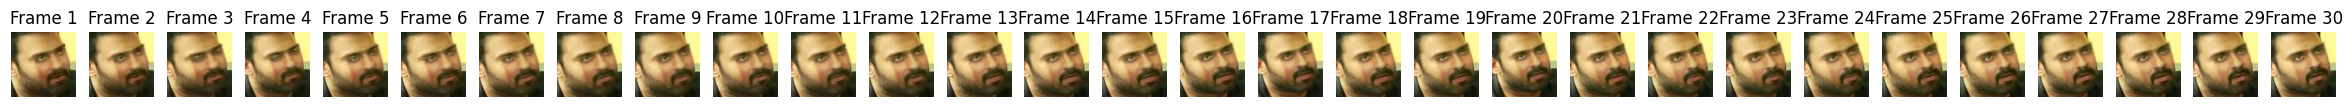

In [12]:
def test_face_dataset():
    TRAIN_FOLDERS = ['/content/FakeAVCeleb/']
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    dataset = FaceDeepfakeDataset(TRAIN_FOLDERS, n_frames=30, train=True, device=device)

    # Одержуємо перший батч
    for i, batch in enumerate(dataset):
        frames, label = batch
        print(f"Label: {label}")

        # Перевіряємо розмір кадрів
        if frames.size() != torch.Size([30, 3, 224, 224]):
            print(f"Unexpected frame size: {frames.size()}")

        # Візуалізуємо перші два кадри
        fig, axes = plt.subplots(1, 30, figsize=(30, 10))

        for j in range(30):
            ax = axes[j]
            frame = frames[j].cpu().permute(1, 2, 0).numpy()  # Перетворюємо з CHW в HWC і конвертуємо в NumPy
            ax.imshow(frame)  # Виводимо зображення
            ax.set_title(f"Frame {j+1}")
            ax.axis('off')

        plt.show()
        break  # Призупиняємо після першого батчу

test_face_dataset()

In [13]:
class FaceDeepfakeDatasetTest(torch.utils.data.Dataset):
    def __init__(self, folders, n_frames=None, n_audio_reads=50027, train=True, device=None, cache_folder=None):
        self.n_frames = n_frames
        self.videos = []
        self.train = train
        self.device = device if device is not None else torch.device("cpu")
        self.cache_folder = cache_folder
        self.detector = MTCNN(device=device, post_process=False)

        # Load video paths
        for i in range(len(folders)):
            if train:
                with open('/content/output_balenced_test.json') as f:
                    videos = json.load(f)
                    videos = [(video, metadata) for (video, metadata) in videos.items()]
                    self.videos += videos
            else:
                self.videos += glob.glob(folders[i] + "/*.mp4")

        if self.cache_folder:
            os.makedirs(self.cache_folder, exist_ok=True)

    def __process_frame(self, frame, prev_frame):
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        boxes, _ = self.detector.detect(frame, landmarks=False)  # Отримуємо координати обличчя

        if boxes is None:
            face = prev_frame
            face = cv2.resize(face, (224, 224))
            face = torch.from_numpy(face).permute(2, 0, 1).float() / 255.0
            return face
        else:
            # Беремо перше обличчя (якщо знайдено кілька)
            box = boxes[0]

            # Розширюємо рамку на 30%
            width = box[2] - box[0]
            height = box[3] - box[1]
            expand_x = width * 0.3 / 2
            expand_y = height * 0.3 / 2
            x1 = max(int(box[0] - expand_x), 0)
            y1 = max(int(box[1] - expand_y), 0)
            x2 = min(int(box[2] + expand_x), frame.shape[1])
            y2 = min(int(box[3] + expand_y), frame.shape[0])

            # Обрізаємо зображення за новими координатами
            face = frame[y1:y2, x1:x2]
            face = cv2.resize(face, (224, 224))  # Масштабуємо до 300x300

            # Перетворюємо на тензор і нормалізуємо
            face = torch.from_numpy(face).permute(2, 0, 1).float() / 255.0

        return face

    def __pad_or_trim_frames(self, frames):
        if len(frames) == self.n_frames:
            return frames
        elif len(frames) < self.n_frames:
            # Дублюємо останній кадр поки не досягнемо необхідної кількості
            frames += [frames[-1]] * (self.n_frames - len(frames))
        elif len(frames) > self.n_frames:
            # Залишаємо тільки перші n_frames кадрів
            frames = frames[:self.n_frames]
        return frames

    def __getitem__(self, n):
        if self.train:
            video, metadata = self.videos[n]
        else:
            video = self.videos[n]

        # Check if cached frames exist
        cache_file = None
        if self.cache_folder:
            video_name = video.replace('.mp4', '_frames.pt')
            video_name = video_name.replace(' ', '_')
            video_name = video_name.replace('/', '_')
            cache_file = os.path.join(self.cache_folder, video_name)
            if os.path.exists(cache_file):
                frames = torch.load(cache_file).to(self.device)
                if self.train:
                    label = 0.0
                    if metadata['label'] == 'C' or metadata['label'] == 'D':
                        label = 1.0
                    return frames, torch.FloatTensor([label]).to(self.device)
                else:
                    return frames

        # Processing video frames
        if os.path.islink(video):
            video = os.readlink(video)

        cap = cv2.VideoCapture(video)
        prev_frame = torch.zeros((3, 224, 224))
        frames = []
        for _ in range(self.n_frames):
            ret, frame = cap.read()
            if not ret:
                break
            frames.append(self.__process_frame(frame, prev_frame))
            prev_frame = frame
        cap.release()

        # Pad or trim frames to ensure consistent length
        frames = self.__pad_or_trim_frames(frames)
        frames = torch.stack(frames).to(self.device)

        # Cache processed frames
        if cache_file:
            torch.save(frames, cache_file)

        # Return data
        if self.train:
            label = 0.0
            if metadata['label'] == 'C' or metadata['label'] == 'D':
                label = 1.0
            return frames, torch.FloatTensor([label]).to(self.device)
        else:
            return frames

    def __len__(self):
        return len(self.videos)

Label: tensor([1.], device='cuda:0')


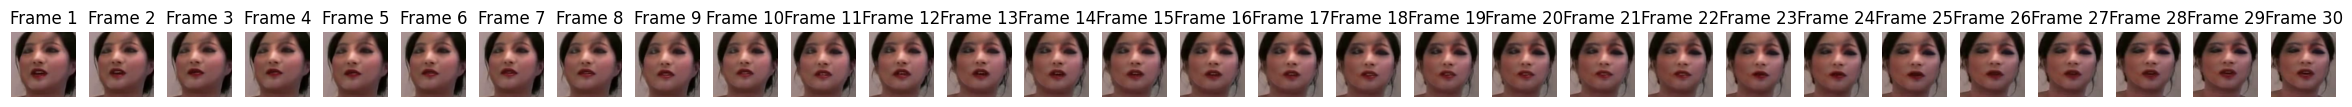

In [14]:
def test_face_dataset():
    TRAIN_FOLDERS = ['/content/fake_videos/train']
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    dataset = FaceDeepfakeDatasetTest(TRAIN_FOLDERS, n_frames=30, train=True, device=device, cache_folder=None)

    # Одержуємо перший батч
    for i, batch in enumerate(dataset):
        frames, label = batch
        print(f"Label: {label}")

        # Перевіряємо розмір кадрів
        if frames.size() != torch.Size([30, 3, 224, 224]):
            print(f"Unexpected frame size: {frames.size()}")

        # Візуалізуємо перші два кадри
        fig, axes = plt.subplots(1, 30, figsize=(30, 10))

        for j in range(30):
            ax = axes[j]
            frame = frames[j].cpu().permute(1, 2, 0).numpy()  # Перетворюємо з CHW в HWC і конвертуємо в NumPy
            ax.imshow(frame)  # Виводимо зображення
            ax.set_title(f"Frame {j+1}")
            ax.axis('off')

        plt.show()
        break  # Призупиняємо після першого батчу

test_face_dataset()

In [24]:
import torch
import torch.nn as nn
import math
from torch.nn import functional as F
import torchvision.models as models


class FaceClassifier(nn.Module):
    def __init__(self, n_linear_hidden=256, lstm_hidden_dim=256, num_lstm_layers=16, dropout=0.5):
        super(FaceClassifier, self).__init__()

        # Завантаження попередньо натренованої EfficientNet
        self.cnn = models.efficientnet_b0(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(self.cnn.children())[:-1])  # Виключаємо шар класифікації

        for param in self.feature_extractor.parameters():
            param.requires_grad = False

        # Розмір виходу від feature extractor
        self.feature_output_size = 1280  # EfficientNet B7 дає 2560 ознак

        # LSTM для обробки послідовності ознак кожного кадру
        self.lstm = nn.GRU(input_size=self.feature_output_size,
                            hidden_size=lstm_hidden_dim,
                            num_layers=num_lstm_layers,
                            dropout=dropout,
                            batch_first=True,
                            bidirectional=True)

        # Повнозв'язні шари для класифікації
        self.fc1 = nn.Linear(2 * lstm_hidden_dim, n_linear_hidden)  # множимо на 2 через bidirectional LSTM
        self.fc2 = nn.Linear(n_linear_hidden, 1)

    def forward(self, vid_frames):
        # Витягання ознак для кожного кадру
        batch_size, num_frames, channels, height, width = vid_frames.shape
        vid_frames = vid_frames.view(batch_size * num_frames, channels, height, width)

        # Використовуємо фічерний екстрактор
        with torch.no_grad():
            vid_features = self.feature_extractor(vid_frames)

        # Переформатовуємо ознаки для LSTM
        vid_features = vid_features.view(batch_size, num_frames, -1)  # (batch_size, num_frames, feature_output_size)

        # Обробка послідовності кадрів через LSTM
        lstm_out, _ = self.lstm(vid_features)  # lstm_out: (batch_size, num_frames, 2 * lstm_hidden_dim)

        # Використання середнього значення по кадрам для об'єднання послідовності (можна також використовувати останній кадр або інші методи агрегації)
        lstm_out = torch.mean(lstm_out, dim=1)  # (batch_size, 2 * lstm_hidden_dim)

        # Класифікаційні шари
        x = torch.relu(self.fc1(lstm_out))
        x = self.fc2(x)

        return x

all train folders: ['/content/FakeAVCeleb'], <class 'list'>
all test folders: ['/content/fake_videos/train'], <class 'list'>


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


start time: 2024-11-09 19:07:09.674612
using device: cuda
100


/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/mtcnn.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)
/usr/local

[[370  30]
 [262 138]]


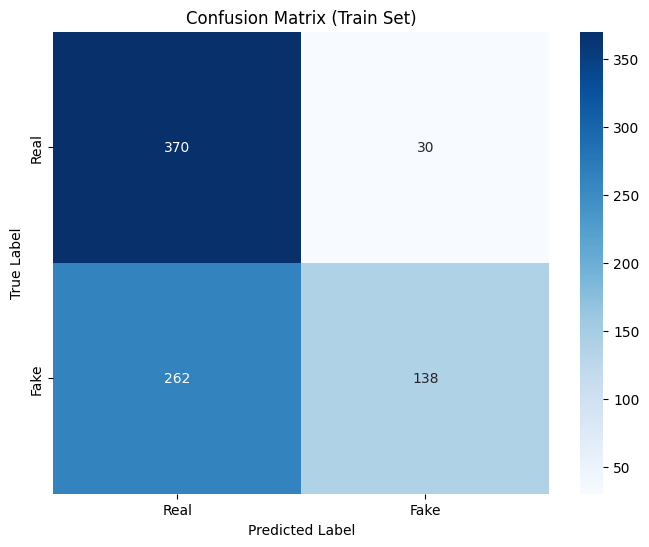

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.59      0.93      0.72       400
        Fake       0.82      0.34      0.49       400

    accuracy                           0.64       800
   macro avg       0.70      0.64      0.60       800
weighted avg       0.70      0.64      0.60       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 0, train loss: 0.6806636214256286, val loss: 2.7226544857025146, executed in: 235.79895043373108
train total: 800, train correct: 508.0, train incorrect: 292.0, train accuracy: 0.6349999904632568
valid total: 200, valid correct: 162.0, valid incorrect: 38.0, valid accuracy: 0.8100000023841858


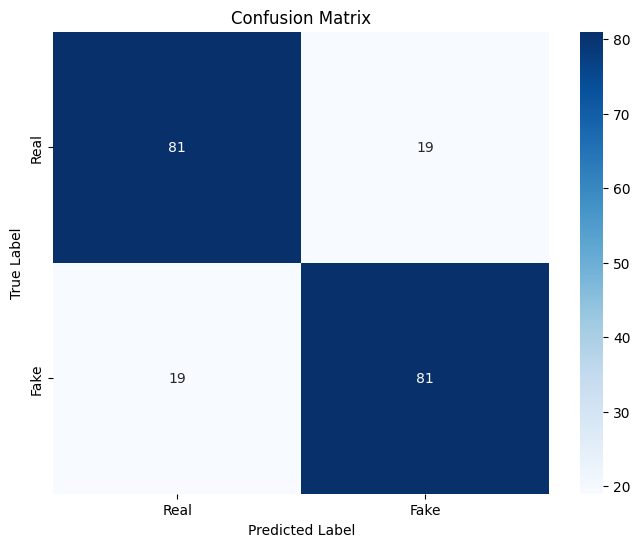

Classification Report:
              precision    recall  f1-score   support

        Real       0.81      0.81      0.81       100
        Fake       0.81      0.81      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [03:12,  1.93s/it]

[[346  54]
 [ 70 330]]


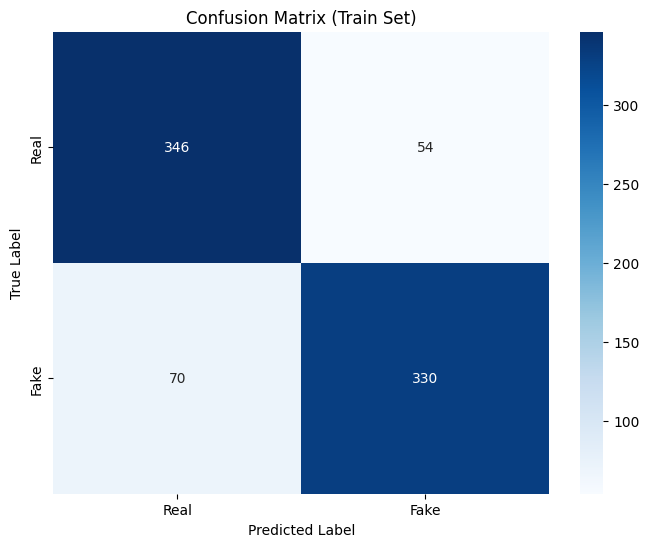

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.83      0.86      0.85       400
        Fake       0.86      0.82      0.84       400

    accuracy                           0.84       800
   macro avg       0.85      0.84      0.84       800
weighted avg       0.85      0.84      0.84       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 1, train loss: 0.45302572920918466, val loss: 1.8121029168367386, executed in: 237.79853057861328
train total: 800, train correct: 676.0, train incorrect: 124.0, train accuracy: 0.8449999690055847
valid total: 200, valid correct: 165.0, valid incorrect: 35.0, valid accuracy: 0.824999988079071


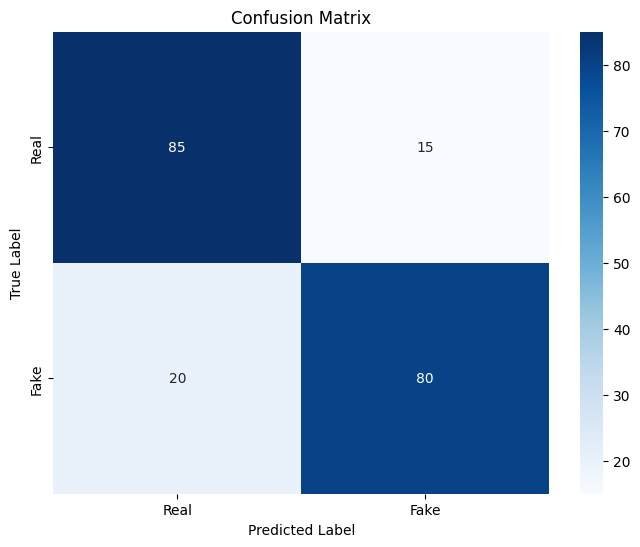

Classification Report:
              precision    recall  f1-score   support

        Real       0.81      0.85      0.83       100
        Fake       0.84      0.80      0.82       100

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [03:10,  1.91s/it]

[[355  45]
 [ 64 336]]


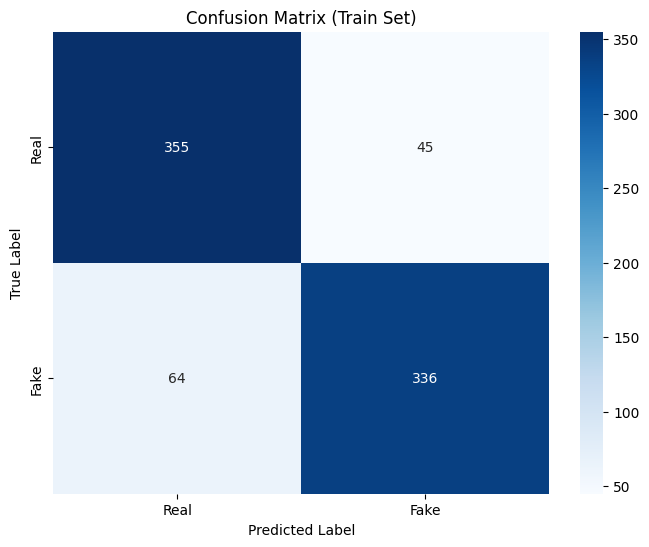

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.85      0.89      0.87       400
        Fake       0.88      0.84      0.86       400

    accuracy                           0.86       800
   macro avg       0.86      0.86      0.86       800
weighted avg       0.86      0.86      0.86       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 2, train loss: 0.3568593702465296, val loss: 1.4274374809861183, executed in: 236.73122835159302
train total: 800, train correct: 691.0, train incorrect: 109.0, train accuracy: 0.8637499809265137
valid total: 200, valid correct: 164.0, valid incorrect: 36.0, valid accuracy: 0.8199999928474426


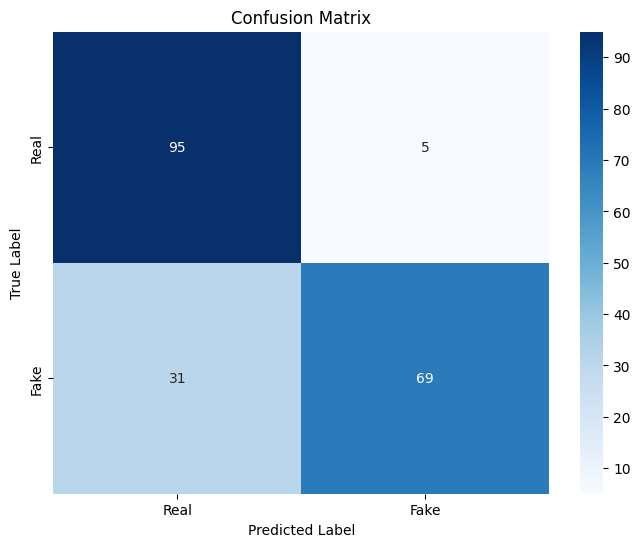

Classification Report:
              precision    recall  f1-score   support

        Real       0.75      0.95      0.84       100
        Fake       0.93      0.69      0.79       100

    accuracy                           0.82       200
   macro avg       0.84      0.82      0.82       200
weighted avg       0.84      0.82      0.82       200



0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [03:16,  1.96s/it]

[[366  34]
 [ 53 347]]


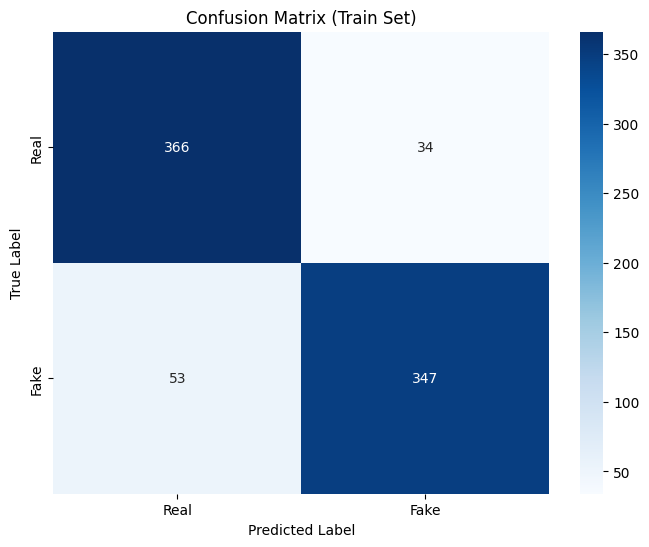

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.87      0.92      0.89       400
        Fake       0.91      0.87      0.89       400

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 3, train loss: 0.2957097806036472, val loss: 1.1828391224145889, executed in: 243.50799226760864
train total: 800, train correct: 713.0, train incorrect: 87.0, train accuracy: 0.89124995470047
valid total: 200, valid correct: 165.0, valid incorrect: 35.0, valid accuracy: 0.824999988079071


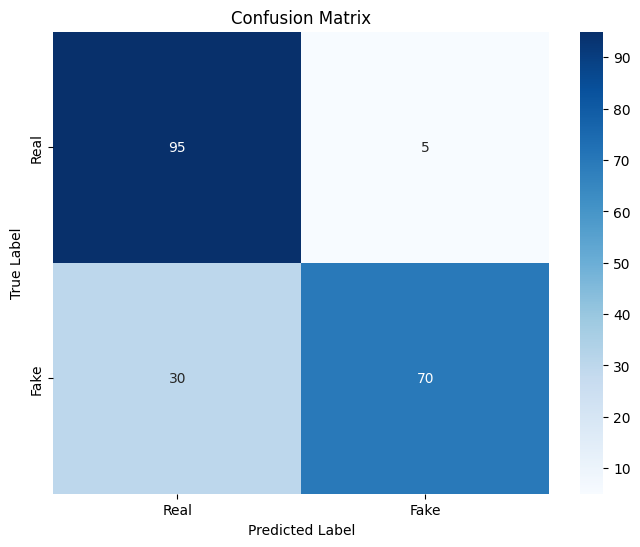

Classification Report:
              precision    recall  f1-score   support

        Real       0.76      0.95      0.84       100
        Fake       0.93      0.70      0.80       100

    accuracy                           0.82       200
   macro avg       0.85      0.82      0.82       200
weighted avg       0.85      0.82      0.82       200



0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [03:16,  1.96s/it]

[[361  39]
 [ 48 352]]


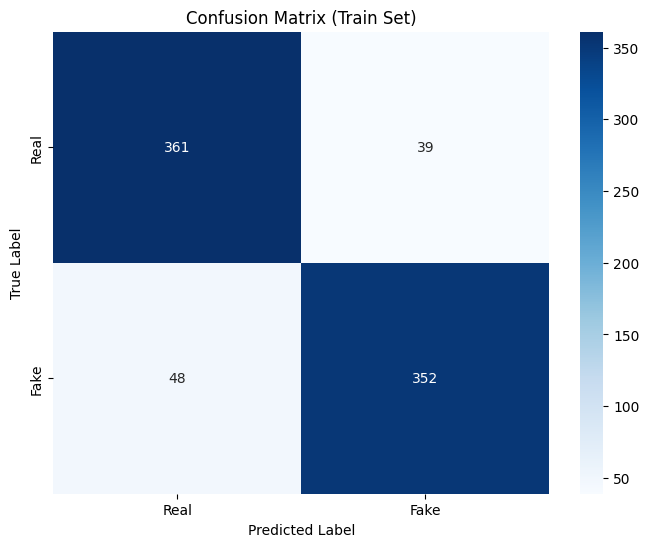

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.88      0.90      0.89       400
        Fake       0.90      0.88      0.89       400

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 4, train loss: 0.29041635036468505, val loss: 1.1616654014587402, executed in: 243.2283580303192
train total: 800, train correct: 713.0, train incorrect: 87.0, train accuracy: 0.89124995470047
valid total: 200, valid correct: 171.0, valid incorrect: 29.0, valid accuracy: 0.8549999594688416


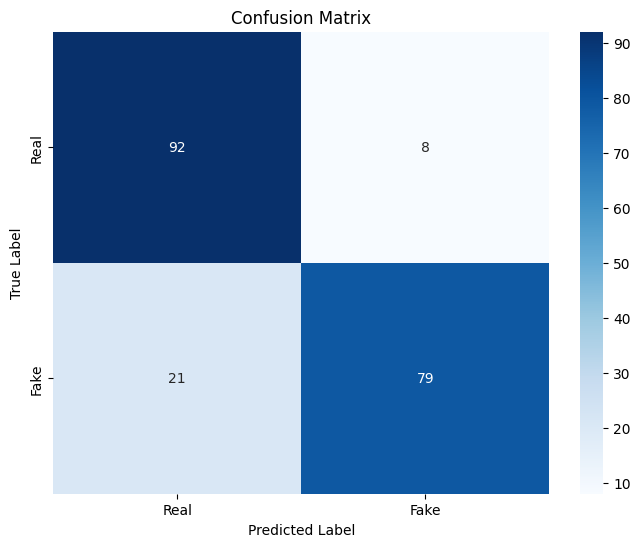

Classification Report:
              precision    recall  f1-score   support

        Real       0.81      0.92      0.86       100
        Fake       0.91      0.79      0.84       100

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [03:12,  1.92s/it]

[[366  34]
 [ 52 348]]


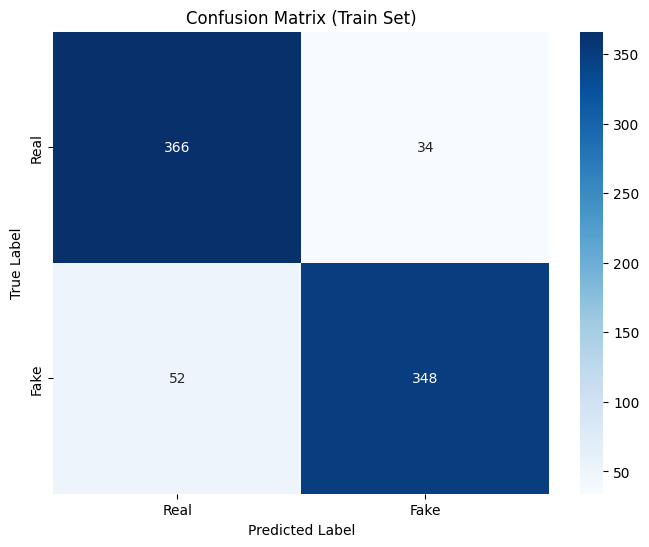

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.88      0.92      0.89       400
        Fake       0.91      0.87      0.89       400

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 5, train loss: 0.2768728192150593, val loss: 1.1074912768602372, executed in: 237.72288918495178
train total: 800, train correct: 714.0, train incorrect: 86.0, train accuracy: 0.8924999833106995
valid total: 200, valid correct: 167.0, valid incorrect: 33.0, valid accuracy: 0.8349999785423279


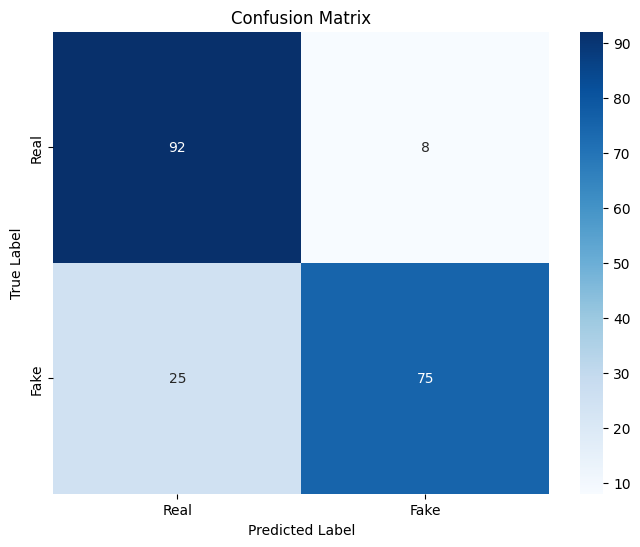

Classification Report:
              precision    recall  f1-score   support

        Real       0.79      0.92      0.85       100
        Fake       0.90      0.75      0.82       100

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [03:12,  1.93s/it]

[[365  35]
 [ 49 351]]


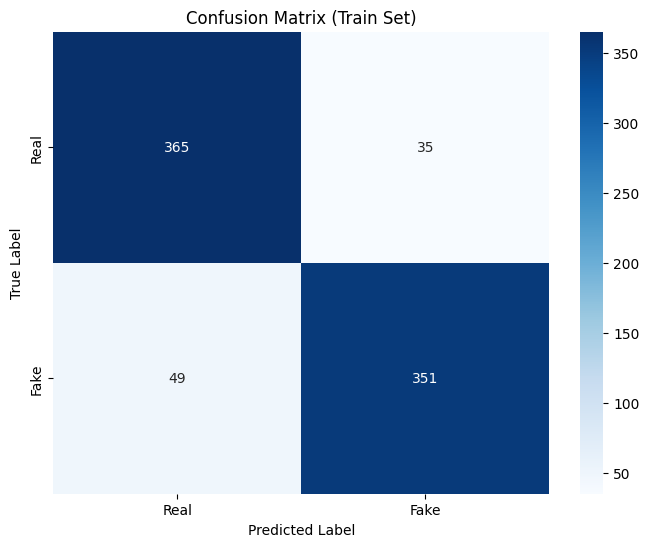

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.88      0.91      0.90       400
        Fake       0.91      0.88      0.89       400

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.89       800
weighted avg       0.90      0.90      0.89       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 6, train loss: 0.2677000563591719, val loss: 1.0708002254366875, executed in: 238.70921635627747
train total: 800, train correct: 716.0, train incorrect: 84.0, train accuracy: 0.8949999809265137
valid total: 200, valid correct: 172.0, valid incorrect: 28.0, valid accuracy: 0.85999995470047


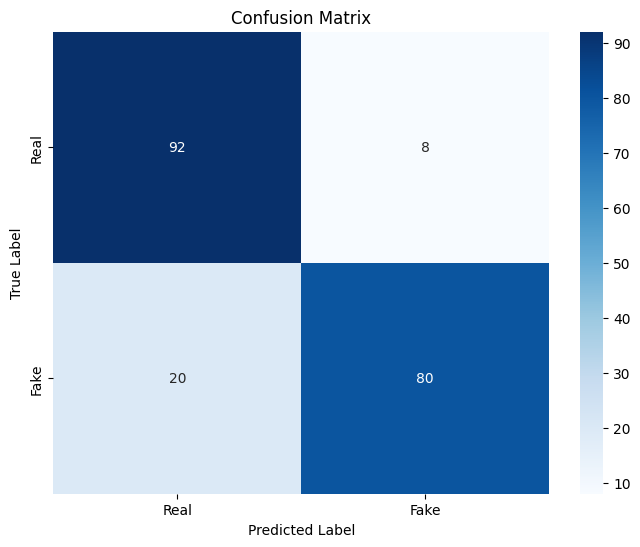

Classification Report:
              precision    recall  f1-score   support

        Real       0.82      0.92      0.87       100
        Fake       0.91      0.80      0.85       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [03:12,  1.93s/it]

[[376  24]
 [ 48 352]]


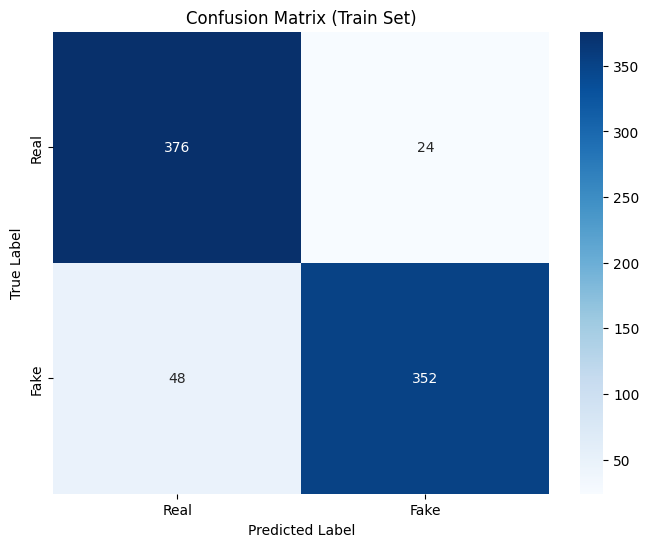

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.89      0.94      0.91       400
        Fake       0.94      0.88      0.91       400

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 7, train loss: 0.2518891437724233, val loss: 1.007556575089693, executed in: 238.49898171424866
train total: 800, train correct: 728.0, train incorrect: 72.0, train accuracy: 0.9099999666213989
valid total: 200, valid correct: 169.0, valid incorrect: 31.0, valid accuracy: 0.8449999690055847


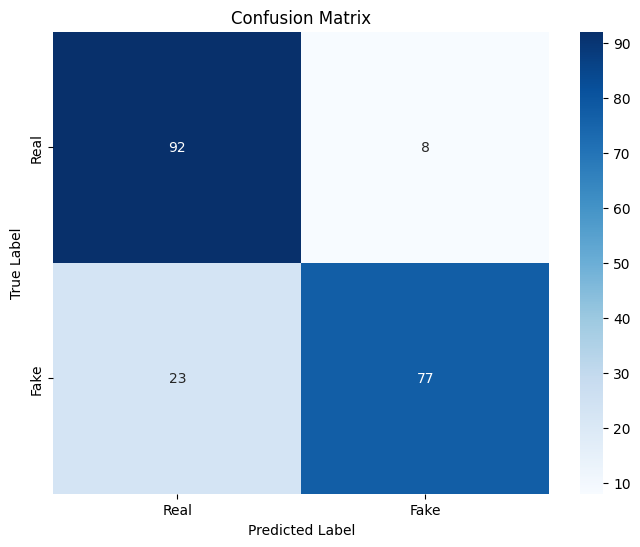

Classification Report:
              precision    recall  f1-score   support

        Real       0.80      0.92      0.86       100
        Fake       0.91      0.77      0.83       100

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [03:12,  1.93s/it]

[[362  38]
 [ 47 353]]


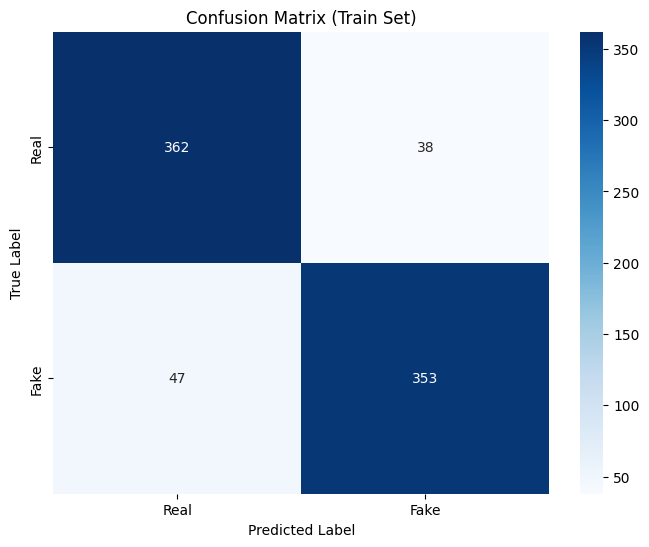

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.89      0.91      0.89       400
        Fake       0.90      0.88      0.89       400

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 8, train loss: 0.26341248460114003, val loss: 1.0536499384045601, executed in: 238.51784133911133
train total: 800, train correct: 715.0, train incorrect: 85.0, train accuracy: 0.8937499523162842
valid total: 200, valid correct: 172.0, valid incorrect: 28.0, valid accuracy: 0.85999995470047


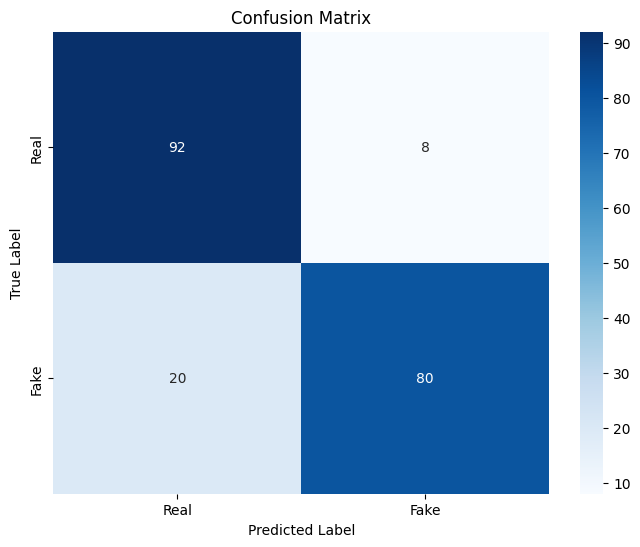

Classification Report:
              precision    recall  f1-score   support

        Real       0.82      0.92      0.87       100
        Fake       0.91      0.80      0.85       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [03:13,  1.94s/it]

[[367  33]
 [ 45 355]]


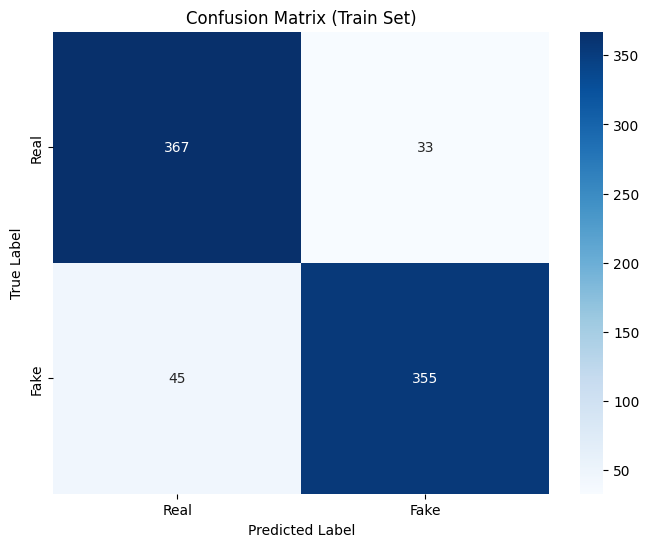

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.89      0.92      0.90       400
        Fake       0.91      0.89      0.90       400

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 9, train loss: 0.25604151520878077, val loss: 1.024166060835123, executed in: 240.6410207748413
train total: 800, train correct: 722.0, train incorrect: 78.0, train accuracy: 0.9024999737739563
valid total: 200, valid correct: 172.0, valid incorrect: 28.0, valid accuracy: 0.85999995470047


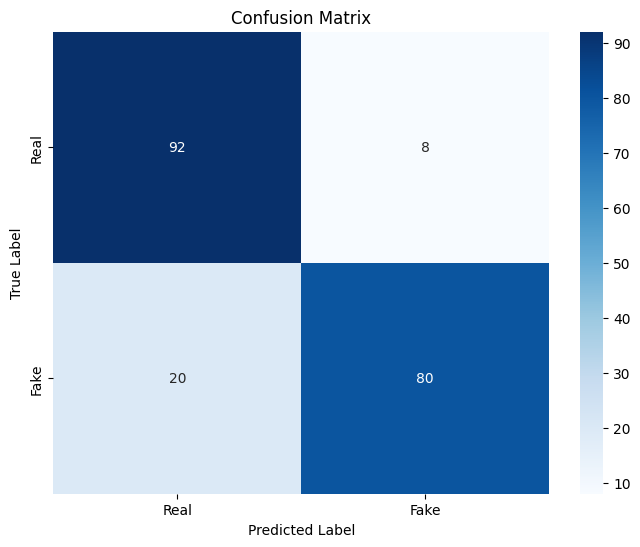

Classification Report:
              precision    recall  f1-score   support

        Real       0.82      0.92      0.87       100
        Fake       0.91      0.80      0.85       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [03:13,  1.94s/it]

[[366  34]
 [ 40 360]]


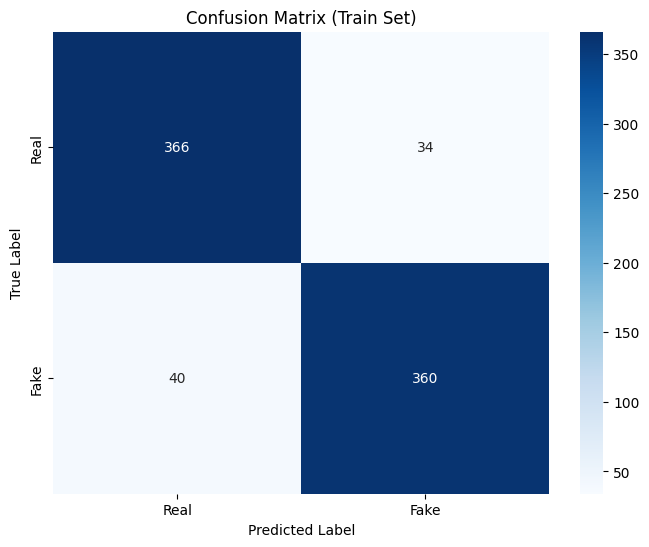

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.90      0.92      0.91       400
        Fake       0.91      0.90      0.91       400

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 10, train loss: 0.25972133070230485, val loss: 1.0388853228092194, executed in: 240.03590726852417
train total: 800, train correct: 726.0, train incorrect: 74.0, train accuracy: 0.9074999690055847
valid total: 200, valid correct: 173.0, valid incorrect: 27.0, valid accuracy: 0.8650000095367432


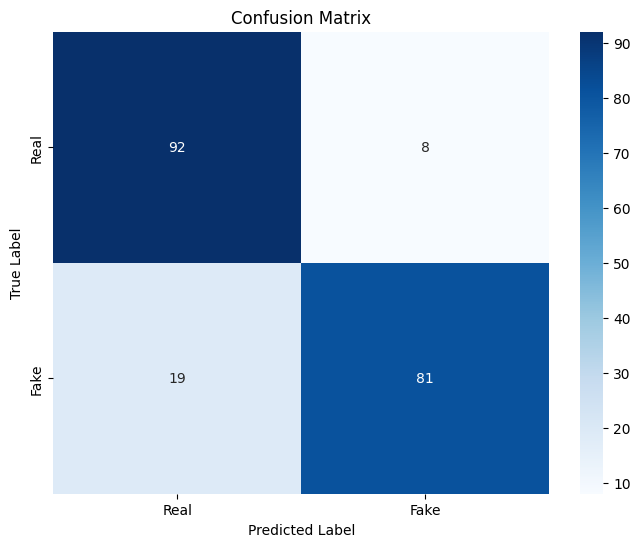

Classification Report:
              precision    recall  f1-score   support

        Real       0.83      0.92      0.87       100
        Fake       0.91      0.81      0.86       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [03:11,  1.91s/it]

[[373  27]
 [ 41 359]]


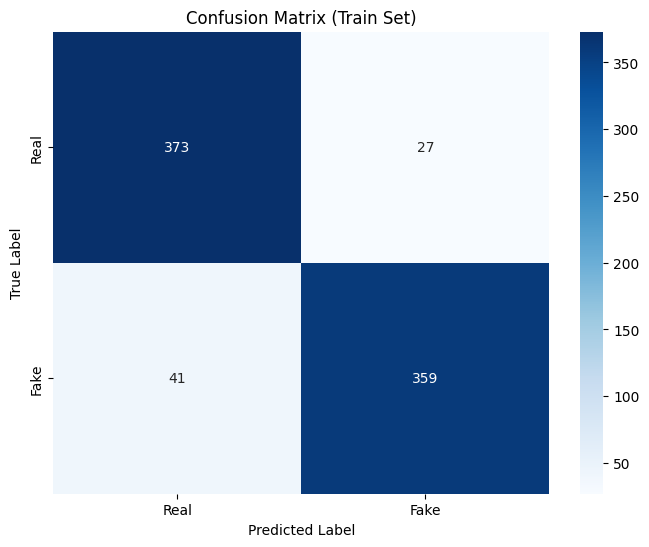

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.90      0.93      0.92       400
        Fake       0.93      0.90      0.91       400

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.91       800
weighted avg       0.92      0.92      0.91       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 11, train loss: 0.24028786916285752, val loss: 0.9611514766514301, executed in: 236.78841090202332
train total: 800, train correct: 732.0, train incorrect: 68.0, train accuracy: 0.9149999618530273
valid total: 200, valid correct: 170.0, valid incorrect: 30.0, valid accuracy: 0.8499999642372131


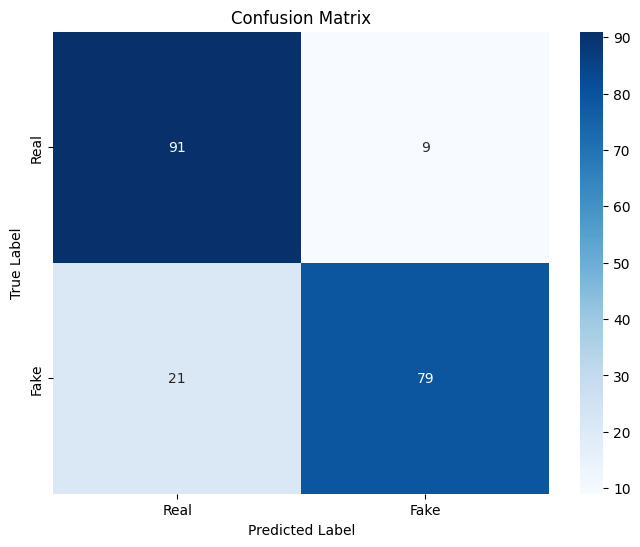

Classification Report:
              precision    recall  f1-score   support

        Real       0.81      0.91      0.86       100
        Fake       0.90      0.79      0.84       100

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [03:12,  1.93s/it]

[[372  28]
 [ 38 362]]


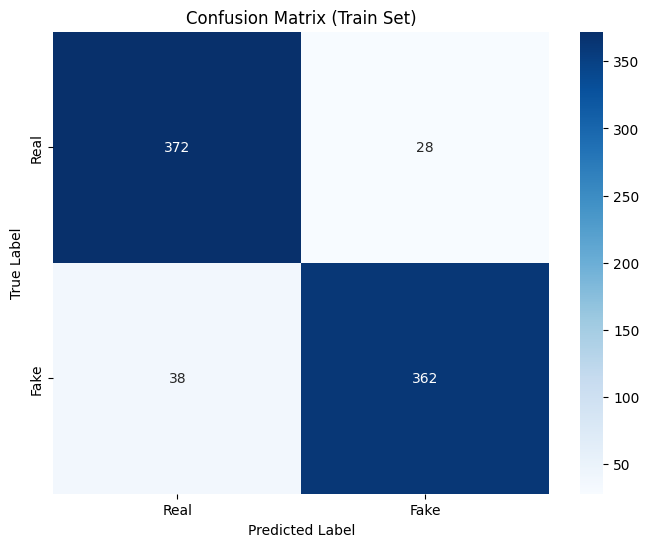

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.91      0.93      0.92       400
        Fake       0.93      0.91      0.92       400

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 12, train loss: 0.23070033725351094, val loss: 0.9228013490140438, executed in: 238.73999667167664
train total: 800, train correct: 734.0, train incorrect: 66.0, train accuracy: 0.9174999594688416
valid total: 200, valid correct: 171.0, valid incorrect: 29.0, valid accuracy: 0.8549999594688416


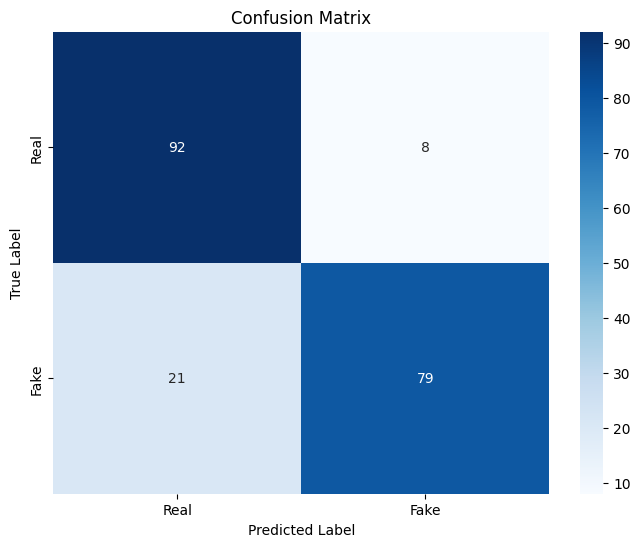

Classification Report:
              precision    recall  f1-score   support

        Real       0.81      0.92      0.86       100
        Fake       0.91      0.79      0.84       100

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [03:13,  1.93s/it]

[[371  29]
 [ 49 351]]


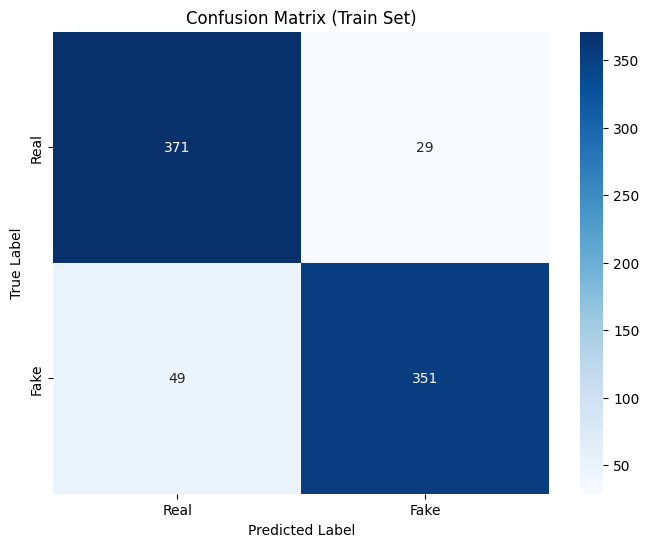

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.88      0.93      0.90       400
        Fake       0.92      0.88      0.90       400

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 13, train loss: 0.2549224969372153, val loss: 1.0196899877488612, executed in: 240.4707498550415
train total: 800, train correct: 722.0, train incorrect: 78.0, train accuracy: 0.9024999737739563
valid total: 200, valid correct: 171.0, valid incorrect: 29.0, valid accuracy: 0.8549999594688416


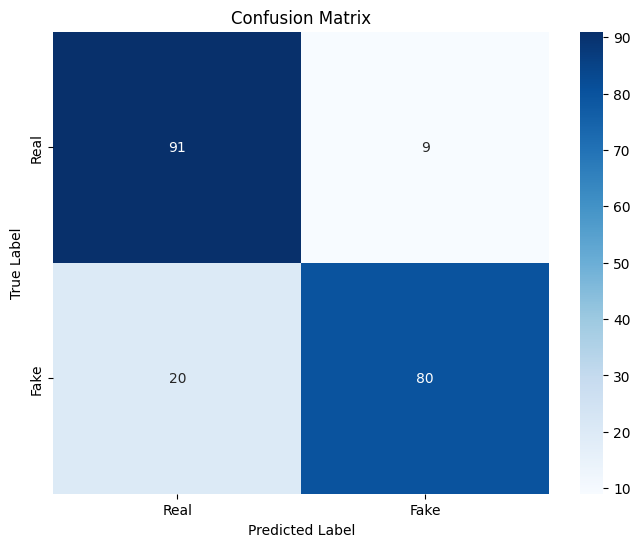

Classification Report:
              precision    recall  f1-score   support

        Real       0.82      0.91      0.86       100
        Fake       0.90      0.80      0.85       100

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [03:16,  1.97s/it]

[[374  26]
 [ 34 366]]


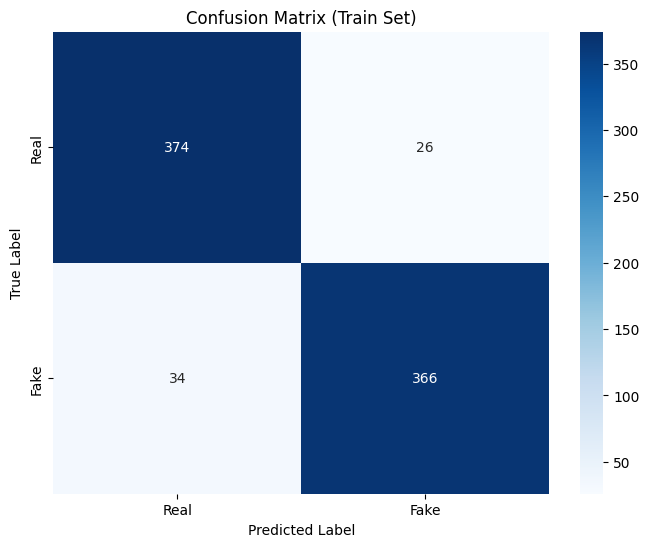

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.92      0.94      0.93       400
        Fake       0.93      0.92      0.92       400

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.92       800
weighted avg       0.93      0.93      0.92       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 14, train loss: 0.22420841567218303, val loss: 0.8968336626887321, executed in: 245.41375923156738
train total: 800, train correct: 740.0, train incorrect: 60.0, train accuracy: 0.9249999523162842
valid total: 200, valid correct: 171.0, valid incorrect: 29.0, valid accuracy: 0.8549999594688416


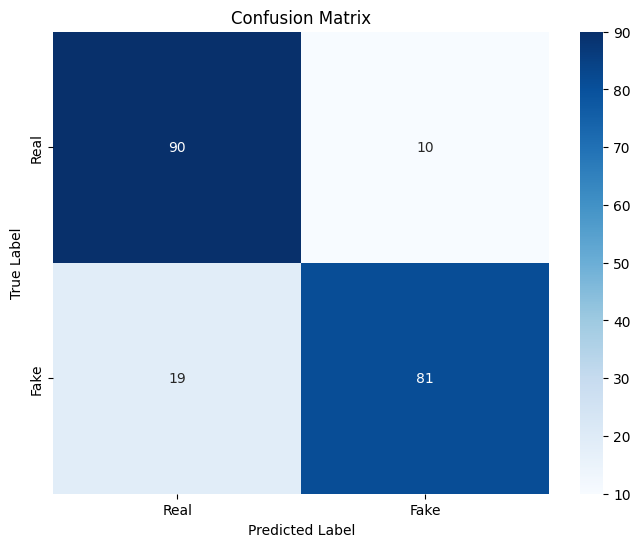

Classification Report:
              precision    recall  f1-score   support

        Real       0.83      0.90      0.86       100
        Fake       0.89      0.81      0.85       100

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200

end time: 2024-11-09 20:07:25.486843
executed in: 1:00:15.812231
Tesla T4
Memory Usage:
Allocated: 1.2 GB
Cached:    3.5 GB


<ipython-input-25-891ee516e71c>:224: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


In [25]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import datetime
import sys
import pandas as pd
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import gc


base_path = 'deepfake-detection-challenge'

#train_folder = os.listdir(str(sys.argv[1]))
train_folders = ['/content/FakeAVCeleb']


#test_folder = os.listdir(str(sys.argv[2]))
test_folders = ['/content/fake_videos/train']

batch_size = int(8)
num_epochs = int(15)
n_frames = int(60)
lr = float(0.00001)

TRAIN_FOLDERS = train_folders
TEST_FOLDERS = test_folders
print(f"all train folders: {train_folders}, {type(train_folders)}")
print(f"all test folders: {test_folders}, {type(test_folders)}")

milestones = [6,12,18]
gamma = 0.1

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


model = FaceClassifier()
#model.load_state_dict(torch.load('/content/drive/MyDrive/experiments/fakeavceleb_gru_train_test_split_b7_8_classifier_30_small.pt', map_location=device))
model = model.to(device)
class_weights = {0: 0.6191950464396285, 1: 10.1230}
weights_tensor = torch.tensor([class_weights[0], 10.1230], dtype=torch.float32).to(device)

# Modify the loss function
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=gamma)

start_time = datetime.datetime.now()
print(f'start time: {str(start_time)}')
print(f'using device: {device}')

'''Splitting into Train and Validation'''
train_dataset = FaceDeepfakeDataset(TRAIN_FOLDERS,  n_frames=n_frames, n_audio_reads=576, device=device, cache_folder="face_encode_cache")
test_dataset = FaceDeepfakeDatasetTest(TEST_FOLDERS, n_frames=n_frames, n_audio_reads=576, device=device, cache_folder="face_encode_cache")

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
print(len(train_loader))

'''Train_Loop'''
train_losses = []
val_losses = []
best_loss = np.inf
train_accuracies = []
val_accuracies = []
epoch_times = []


for epoch in range(num_epochs):
    epoch_start_time = time.time()
    epoch_t_loss = 0
    epoch_v_loss = 0
    t_count = 0
    t_count_wrong = 0
    train_labels_all = []
    train_preds_all = []

    model.train()
    torch.cuda.empty_cache()
    gc.collect()
    for i, batch in tqdm(enumerate(train_loader)):
        torch.cuda.empty_cache()
        gc.collect()
        # if i * batch_size >= epoch_size:
        #     break
        video_data, labels = batch
        video_data = video_data.to(device)
        #audio_data = audio_data.to(device)

        output = model(video_data)
        loss = criterion(output, labels)

        output = torch.sigmoid(output)
        output = output.round()

        n_wrong = (labels - output).abs().sum()
        t_count_wrong += n_wrong
        t_count += labels.shape[0]

        epoch_t_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_labels_all.extend(labels.cpu().detach().numpy())
        train_preds_all.extend(output.cpu().detach().numpy())

        #print('.', end='', flush=True)
        torch.cuda.empty_cache()
        gc.collect()

    # Перетворіть на numpy-масиви
    train_labels_all = np.array(train_labels_all).astype(int)
    train_preds_all = np.array(train_preds_all).astype(int)

    # Обчисліть та виведіть матрицю плутанини для тренувального набору
    conf_matrix_train = confusion_matrix(train_labels_all, train_preds_all)
    print(conf_matrix_train)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Train Set)')
    plt.show()

    # Виведіть класифікаційний звіт для тренувального набору
    print("Classification Report (Train Set):")
    print(classification_report(train_labels_all, train_preds_all, target_names=['Real', 'Fake']))

    all_labels = []
    all_preds = []

    model.eval()
    with torch.no_grad():
        v_count = 0
        v_count_wrong = 0
        for i, batch in enumerate(val_loader):
            # if i * batch_size >= epoch_size:
        #        break
            torch.cuda.empty_cache()
            gc.collect()
            video_data, labels = batch
            video_data = video_data.to(device)
            #audio_data = audio_data.to(device)
            # optimizer.zero_grad()
            output = model(video_data)
            loss = criterion(output, labels)

            output = torch.sigmoid(output)
            output = output.round()
            n_wrong = (labels - output).abs().sum()
            v_count_wrong += n_wrong
            v_count += labels.shape[0]

            epoch_v_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(output.cpu().numpy())

            # loss.backward()
            # optimizer.step()
            print('.', end='', flush=True)
            torch.cuda.empty_cache()
            gc.collect()

    epoch_end_time = time.time()
    epoch_exec_time = epoch_end_time - epoch_start_time
    epoch_times.append(epoch_exec_time)
    train_losses.append(epoch_t_loss/len(train_loader))
    val_losses.append(epoch_t_loss/len(val_loader))

    t_count_right = t_count - t_count_wrong
    v_count_right = v_count - v_count_wrong
    t_accuracy = t_count_right / t_count
    v_accuracy = v_count_right / v_count

    train_accuracies.append(t_accuracy)
    val_accuracies.append(v_accuracy)

    print(f'\nepoch: {epoch}, train loss: {train_losses[-1]}, val loss: {val_losses[-1]}, executed in: {str(epoch_exec_time)}')
    print(f"train total: {t_count}, train correct: {t_count_right}, train incorrect: {t_count_wrong}, train accuracy: {t_accuracy}")
    print(f"valid total: {v_count}, valid correct: {v_count_right}, valid incorrect: {v_count_wrong}, valid accuracy: {v_accuracy}")
    all_labels = np.array(all_labels).astype(int)
    all_preds = np.array(all_preds).astype(int)
    # Обчислення та візуалізація матриці плутанини
    conf_matrix = confusion_matrix(all_labels, all_preds)
    #print(conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Друк звіту про класифікацію
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=['Real', 'Fake']))

    scheduler.step()
    ### Saving model per best validation loss
    if best_loss > val_losses[-1]:
        best_loss = val_losses[-1]
        end_time = datetime.datetime.now()
        torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/fakeavceleb16_layers_gru_train_test_split_b7_{epoch + 1}_classifier_{n_frames}_small.pt')
    torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/fakeavceleb_16_layers_gru_train_test_split_b7_{epoch + 1}_classifier_{n_frames}_small.pt')


end_time = datetime.datetime.now()
print(f"end time: {str(end_time)}")
exec_time = end_time - start_time
print(f"executed in: {str(exec_time)}")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')
